# Siemens Star analysis for different zoom options

In [1]:
import numpy as np
import spyrit.misc.walsh_hadamard as wh
from PIL import Image

from spas import read_metadata, reconstruction_hadamard
from spas import ReconstructionParameters, setup_reconstruction, load_noise, reconstruct
from siemens_star_analysis import *

## Common parameters

In [2]:
SIEMENS_RADIUS = 5 # in mm
SIEMENS_FREQ = 36
MAGNIFICATION = 0.9

R_STEP = 1 # Step for analysis of MTF with varying radii

H = wh.walsh2_matrix(64)
img_interp_method = Image.BICUBIC

In [3]:
zooms = []
res_radii = []
res_MTFs = []
obj_resolutions = []
contrasts = []
contrast_errors = []
radii_ranges = []

## Analysis for 1x zoom

### Normalization data

In [4]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x1_white/zoom_x1_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x1_white/zoom_x1_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [5]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x1_starsector/zoom_x1_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x1_starsector/zoom_x1_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 32
y0 = 32
zoom = 1

im = Image.fromarray(recon_sum)
im = im.convert("L")
im.save("./siemens-x1.png")

### Data visualization

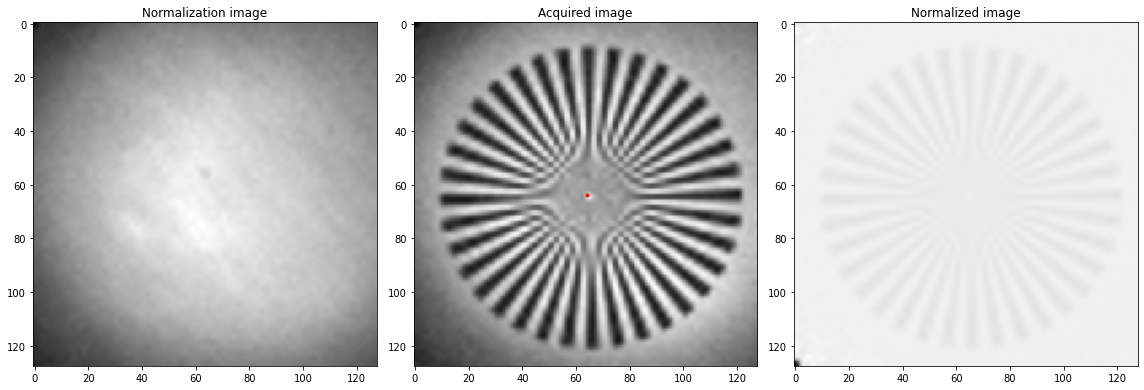

In [6]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

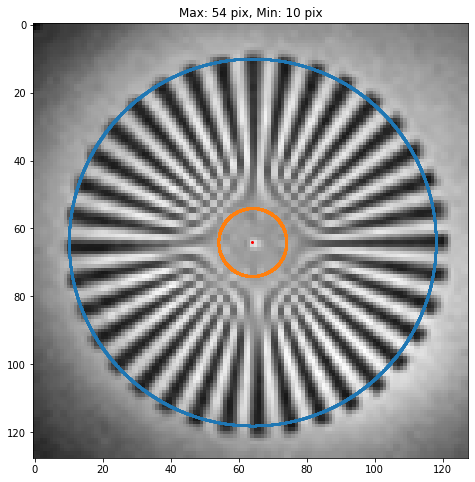

In [7]:
R_MIN = 5*K
R_MAX = 27*K
R_EXT = R_MAX # The same value for the case with 1x magnification
show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

Found resolution at R=13 pix, MTF=0.10097236538672205


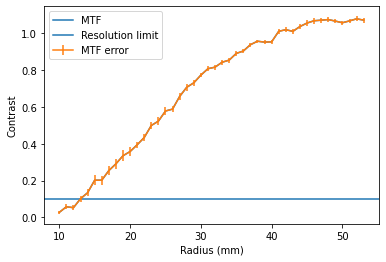

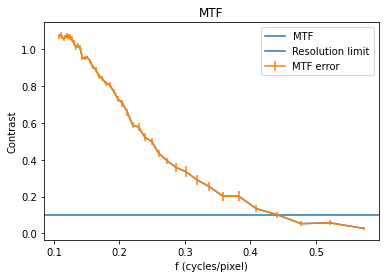

In [8]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [9]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 189.1 μ m


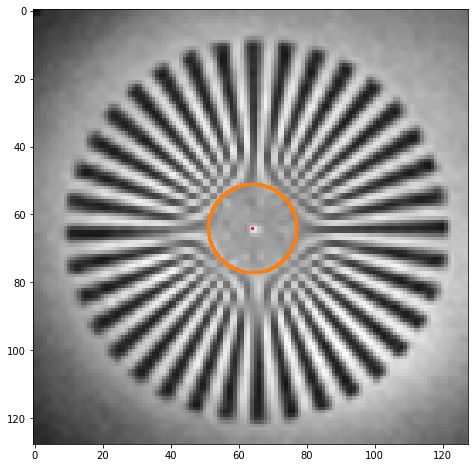

In [10]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [11]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 2x zoom

### Normalization data

In [12]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x2_white/zoom_x2_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x2_white/zoom_x2_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [13]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x2_starsector/zoom_x2_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x2_starsector/zoom_x2_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 33
y0 = 33
zoom = 2

### Data visualization

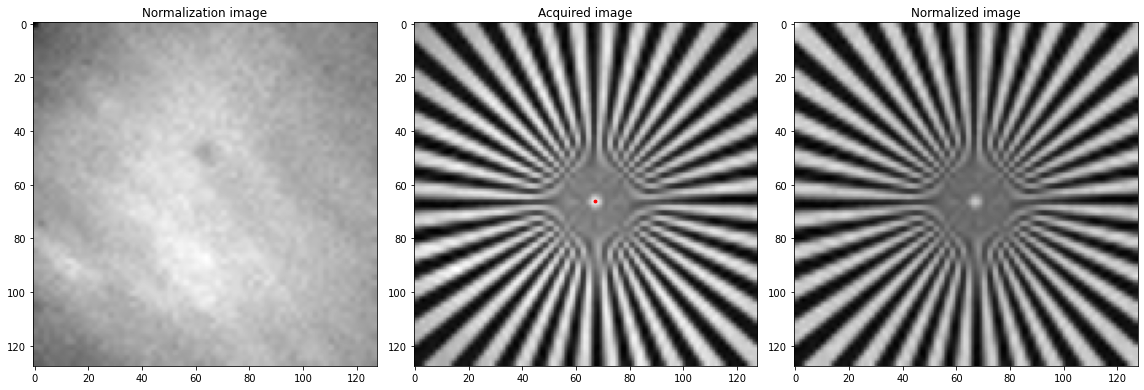

In [14]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0+1)

### External radius

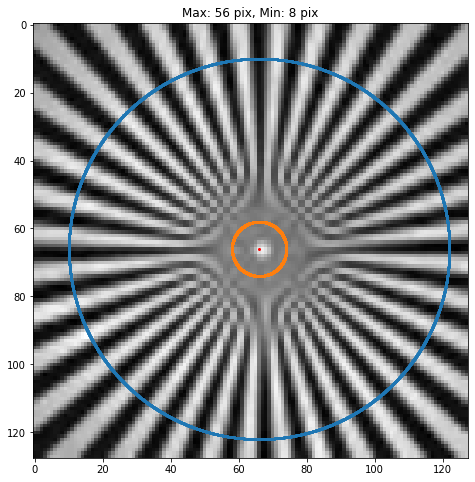

In [15]:
R_MIN = 4*K
R_MAX = 28*K
show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

added one
Found resolution at R=14 pix, MTF=0.11044999858662137


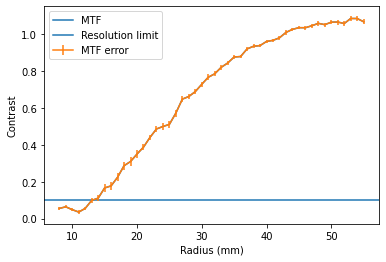

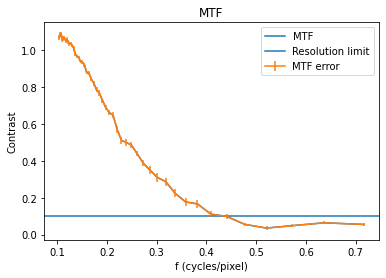

In [16]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [17]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 101.8 μ m


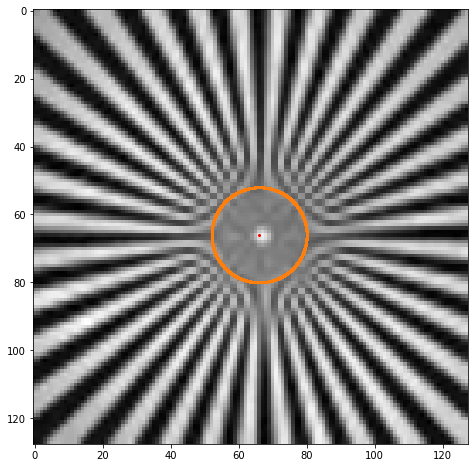

In [18]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [19]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 3x zoom

### Normalization data

In [20]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x3_white/zoom_x3_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x3_white/zoom_x3_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [21]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x3_starsector/zoom_x3_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data//2021-10-20_magnification_starsector_WhiteLED/zoom_x3_starsector/zoom_x3_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 34
y0 = 34
zoom = 3
im = Image.fromarray(recon_sum)
im = im.convert("L")
im.save("./siemens-x3.png")

### Data visualization

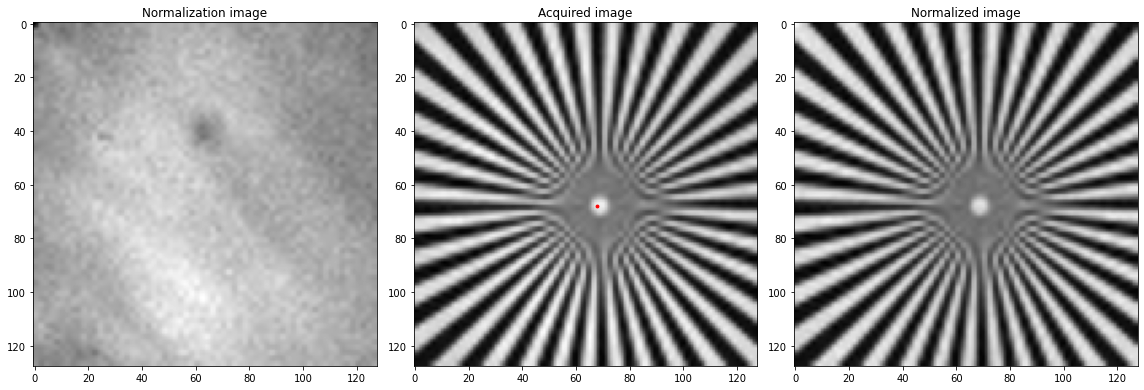

In [22]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

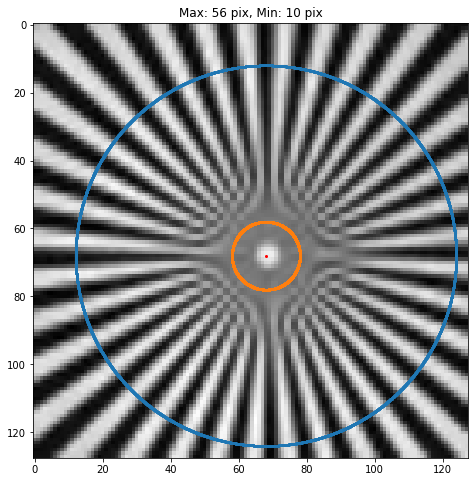

In [25]:
R_MIN = 5*K
R_MAX = 28*K
show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

added one
Found resolution at R=15 pix, MTF=0.1440104914368055


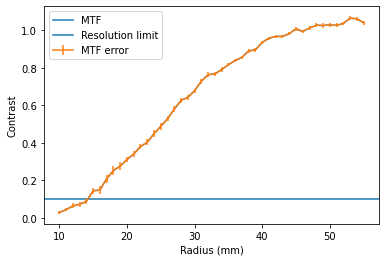

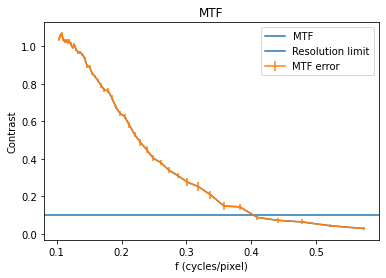

In [27]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [28]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 36.4 μ m


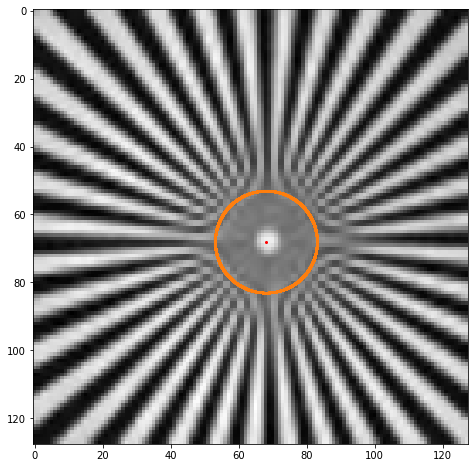

In [29]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [30]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 4x zoom

### Normalization data

In [31]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x4_white/zoom_x4_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x4_white/zoom_x4_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [32]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x4_starsector/zoom_x4_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data//2021-10-20_magnification_starsector_WhiteLED/zoom_x4_starsector/zoom_x4_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 34
y0 = 35
zoom = 4

im = Image.fromarray(recon_sum)
im = im.convert("L")
im.save("./siemens-x4.png")

### Data visualization

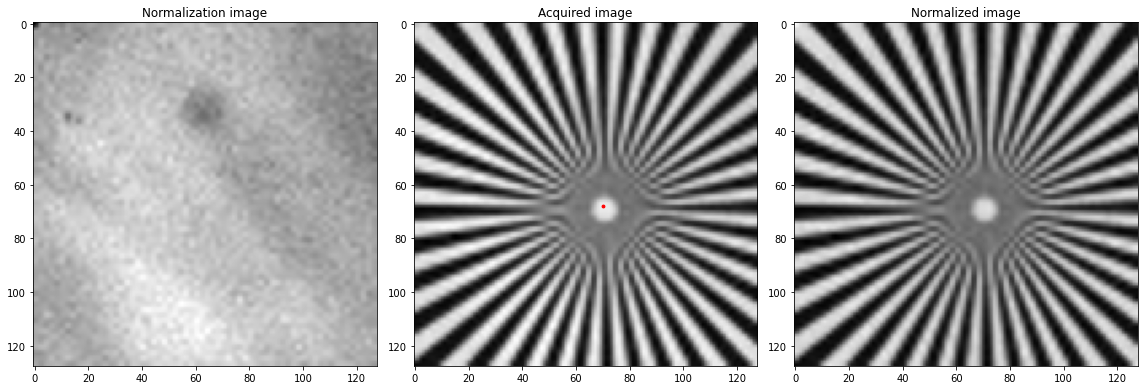

In [33]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius1

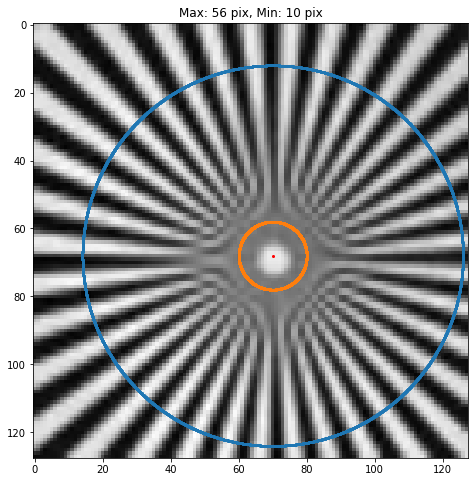

In [34]:
R_MIN = 5*K
R_MAX = 28*K

show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

Found resolution at R=15 pix, MTF=0.10955614919711319


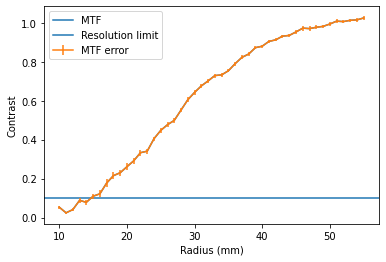

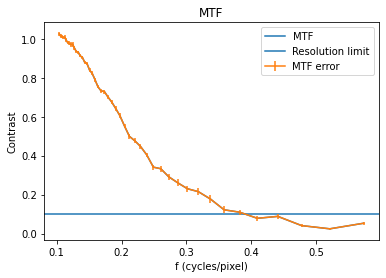

In [35]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [36]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 27.3 μ m


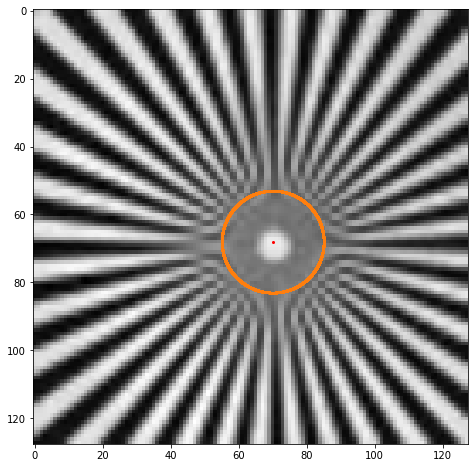

In [37]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [38]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 5x zoom

In [39]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x5_white/zoom_x5_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x5_white/zoom_x5_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [40]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x5_starsector/zoom_x5_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x5_starsector/zoom_x5_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 35
y0 = 36
zoom = 5

### Data visualization

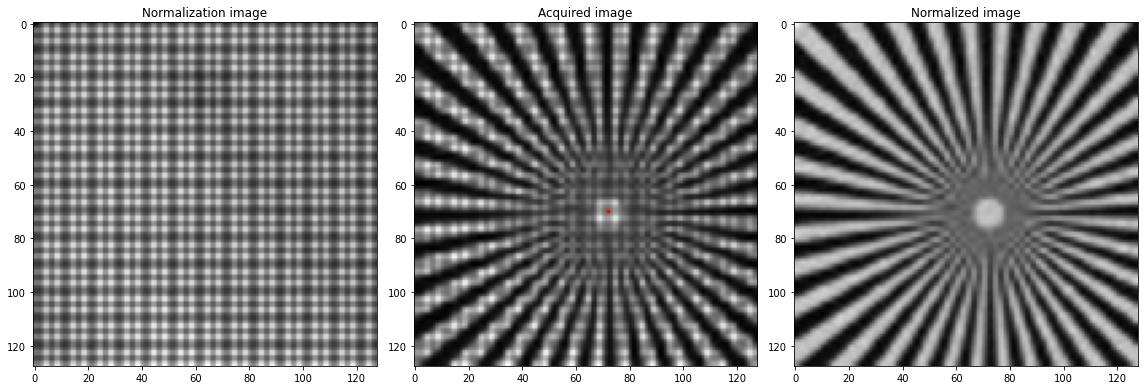

In [41]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

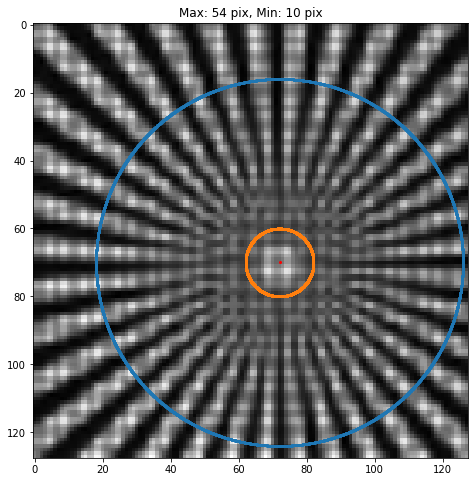

In [42]:
R_MIN = 5*K
R_MAX = 27*K
R_EXT = R_MAX # The same value for the case with 1x magnification
show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

added one
Found resolution at R=15 pix, MTF=0.12014324848204194


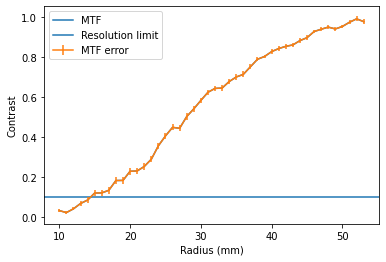

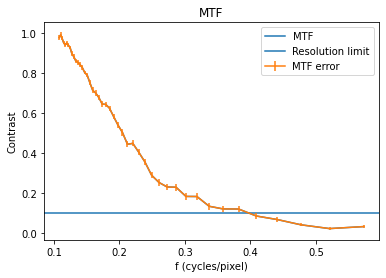

In [43]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [44]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 21.8 μ m


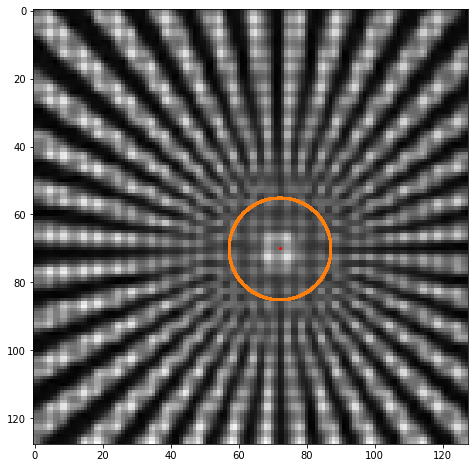

In [45]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [46]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 6x zoom

### Normalization data

In [47]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x6_white/zoom_x6_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x6_white/zoom_x6_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [48]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x6_starsector/zoom_x6_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data//2021-10-20_magnification_starsector_WhiteLED/zoom_x6_starsector/zoom_x6_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 36
y0 = 37
zoom = 6

im = Image.fromarray(recon_sum)
im = im.convert("L")
im.save("./siemens-x6.png")

### Data visualization

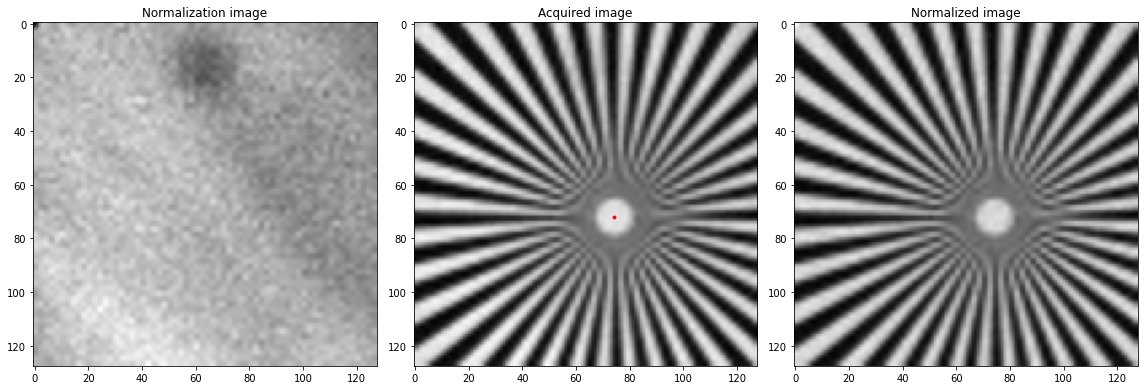

In [49]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

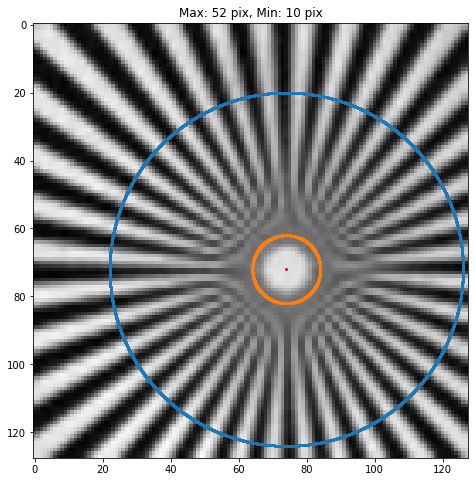

In [50]:
R_MIN = 5*K
R_MAX = 26*K

show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

added one
Found resolution at R=16 pix, MTF=0.10914849627942422


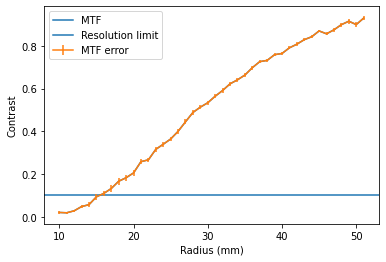

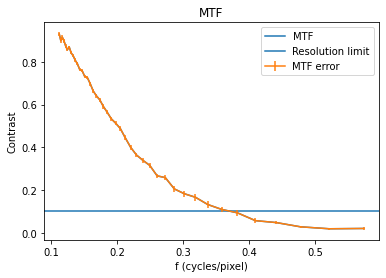

In [51]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [52]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 19.4 μ m


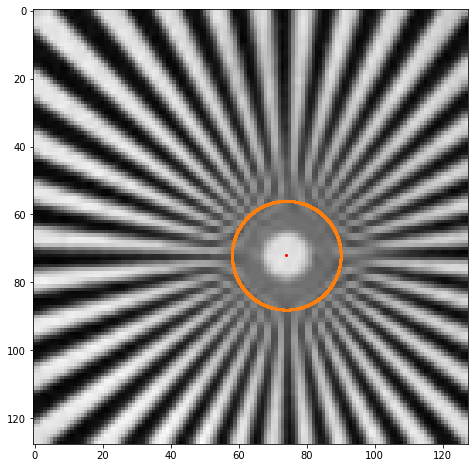

In [53]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [54]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 8x zoom

### Normalization data

In [55]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x8_white/zoom_x8_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x8_white/zoom_x8_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [56]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x8_starsector/zoom_x8_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data//2021-10-20_magnification_starsector_WhiteLED/zoom_x8_starsector/zoom_x8_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 37
y0 = 39
zoom = 8

### Data visualization

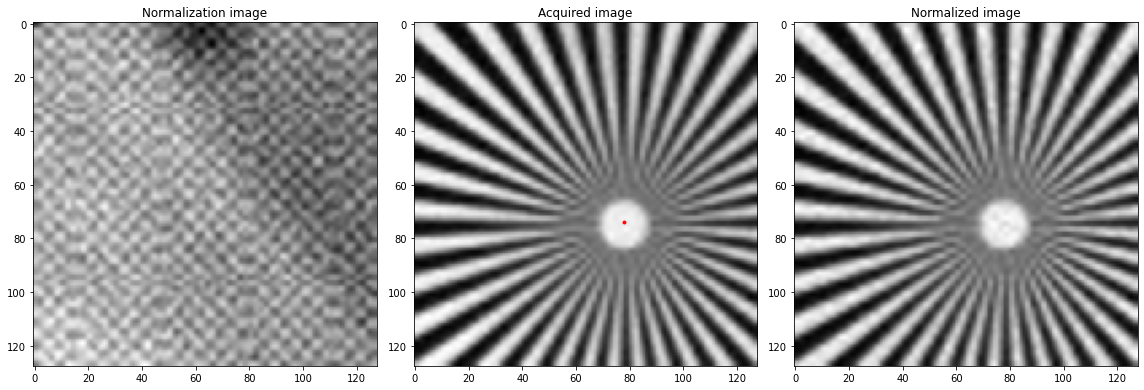

In [57]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

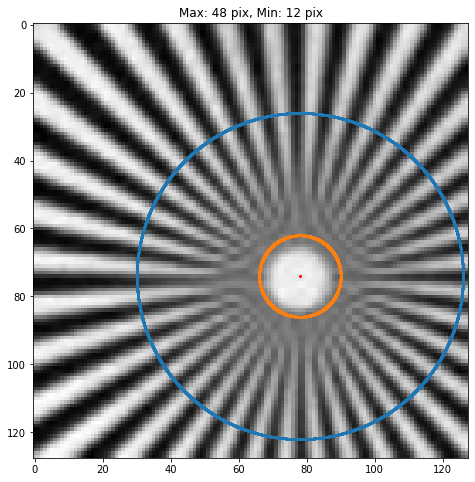

In [58]:
R_MIN = 6*K
R_MAX = 24*K

show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

added one
Found resolution at R=19 pix, MTF=0.11175108795389471


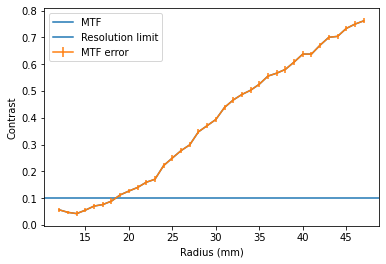

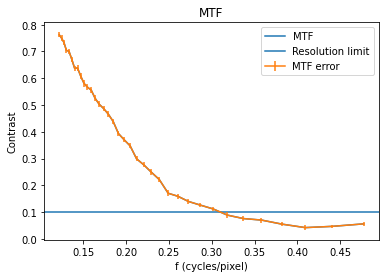

In [59]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [60]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 17.3 μ m


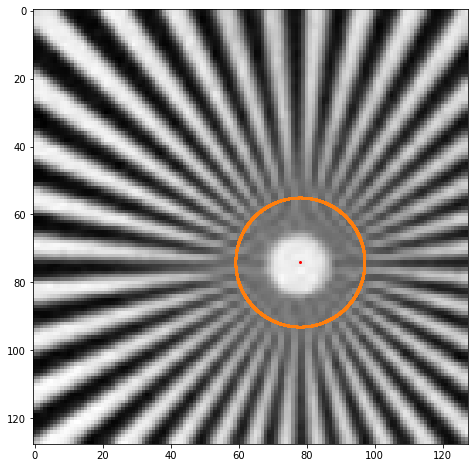

In [61]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [62]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 10x zoom

### Normalization data

In [63]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x10_white/zoom_x10_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x10_white/zoom_x10_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [64]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x10_starsector/zoom_x10_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data//2021-10-20_magnification_starsector_WhiteLED/zoom_x10_starsector/zoom_x10_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 38
y0 = 40
zoom = 10

### Data visualization

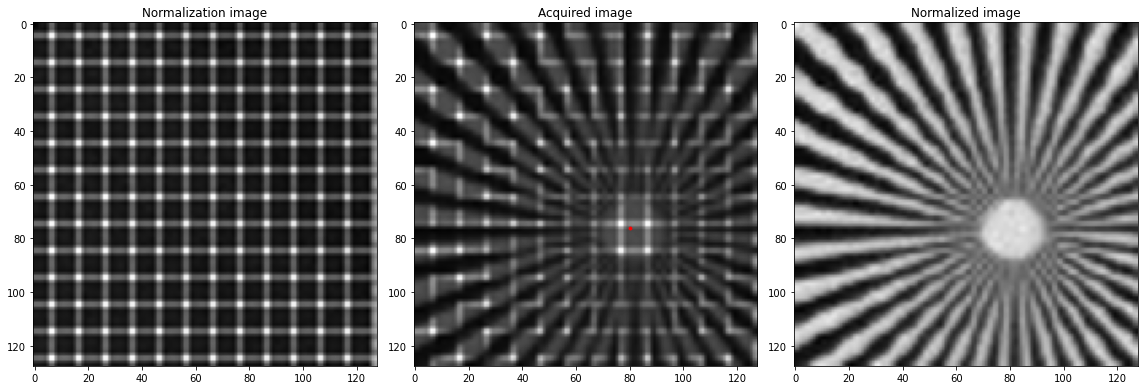

In [65]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

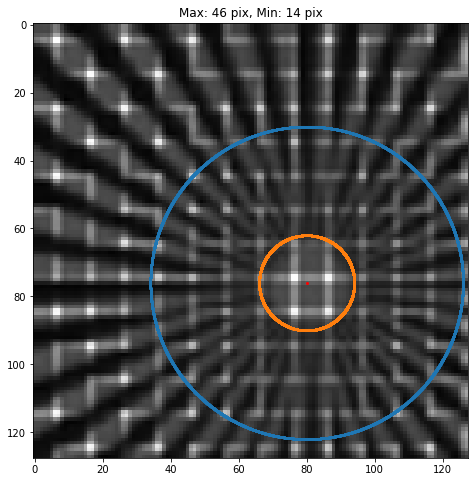

In [66]:
R_MIN = 7*K
R_MAX = 23*K

show_radii(b, K*x0, K*y0, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

added one
Found resolution at R=17 pix, MTF=0.10441123513175493


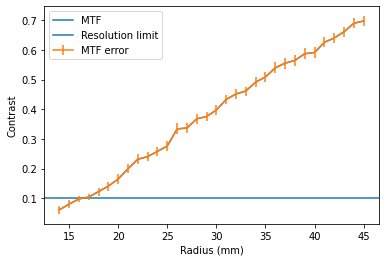

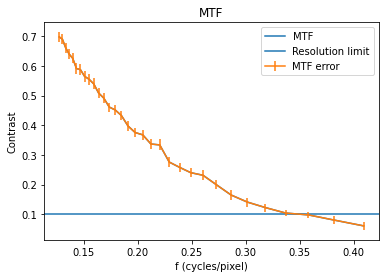

In [67]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [68]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 12.4 μ m


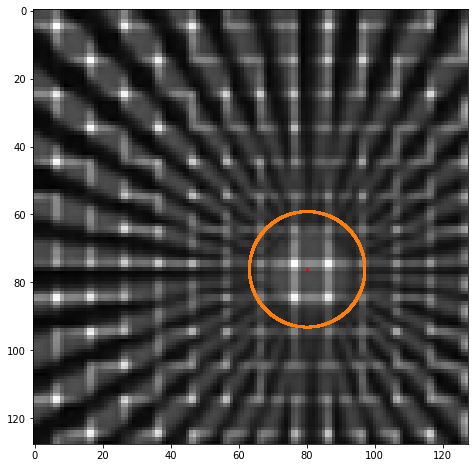

In [69]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [70]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

## Analysis for 12x zoom

### Normalization data

In [71]:
f_norm = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x12_white/zoom_x12_white_spectraldata.npz')

spectral_data_norm = f_norm['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x12_white/zoom_x12_white_metadata.json')

recon_norm = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data_norm)

recon_sum_norm = np.sum(recon_norm,axis=2) # Summing all the wavelength components

### Acquired data

In [72]:
f = np.load('./data/2021-10-20_magnification_starsector_WhiteLED/zoom_x12_starsector/zoom_x12_starsector_spectraldata.npz')

spectral_data = f['spectral_data']

metadata, acquisition_metadata, spectrometer_parameters, dmd_parameters = \
    read_metadata('./data//2021-10-20_magnification_starsector_WhiteLED/zoom_x12_starsector/zoom_x12_starsector_metadata.json')

recon = reconstruction_hadamard(acquisition_metadata.patterns, 'walsh', H, spectral_data)

recon_sum = np.sum(recon,axis=2) # Summing all the wavelength components
recon_sum_normalized = recon_sum/recon_sum_norm

x0 = 40
y0 = 42
zoom = 12
im = Image.fromarray(recon_sum)
im = im.convert("L")
im.save("./siemens-x12.png")

### Data visualization

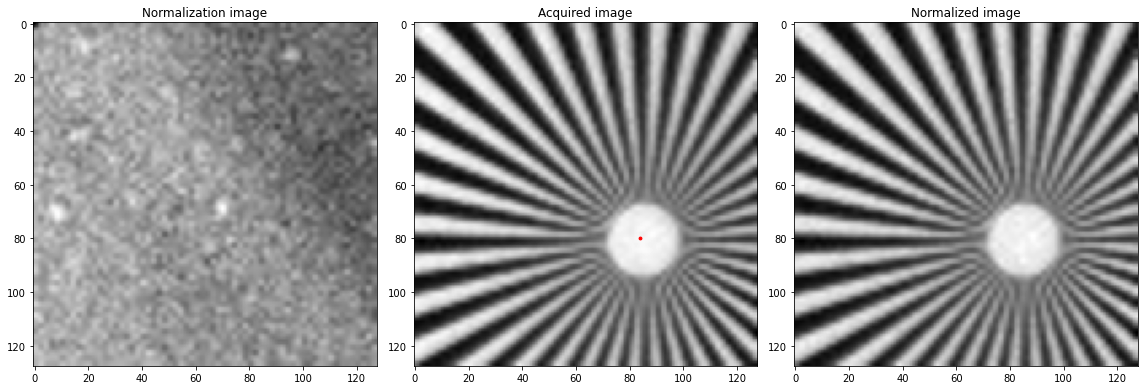

In [73]:
K = 2
a = np.asarray(Image.fromarray(recon_sum_norm).resize((K*64,K*64), img_interp_method))
b = np.asarray(Image.fromarray(recon_sum).resize((K*64,K*64), img_interp_method))
c = np.asarray(Image.fromarray(recon_sum_normalized).resize((K*64,K*64), img_interp_method))
show_acquisition(a, b, c, K*x0, K*y0)

### External radius

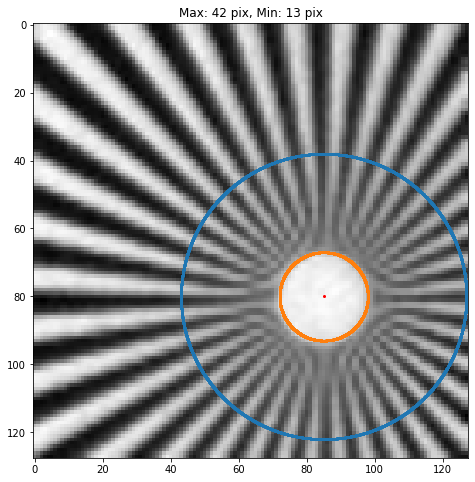

In [74]:
R_MIN = 13
R_MAX = 21*K

show_radii(b, K*x0, K*y0+1, R_MAX, R_MIN, f'Max: {R_MAX} pix, Min: {R_MIN} pix')
radii = np.arange(R_MIN,R_MAX,R_STEP)

### Resolution

Found resolution at R=18 pix, MTF=0.10394566293960493


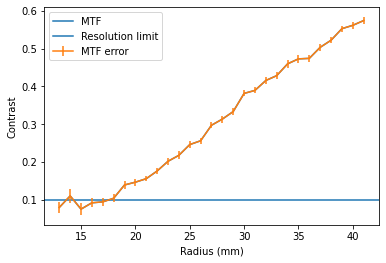

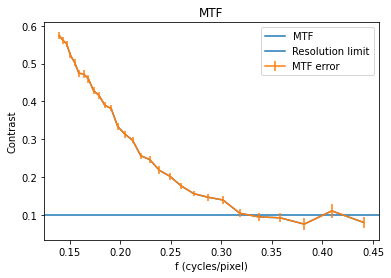

In [75]:
res_radius, res_MTF, contrast, contrast_unc = find_resolution(c, K*x0, K*y0, radii, interactive=False,)
plot_MTF_radius(radii, contrast, contrast_unc)
plot_MTF_freq(radii, contrast, contrast_unc)

In [76]:
obj_res = object_resolution(res_radius, SIEMENS_RADIUS, SIEMENS_FREQ, MAGNIFICATION, R_EXT, K*zoom)
print(f'Object-plane resolution: {1000*obj_res:.1f} \u03BC m')

Object-plane resolution: 10.9 μ m


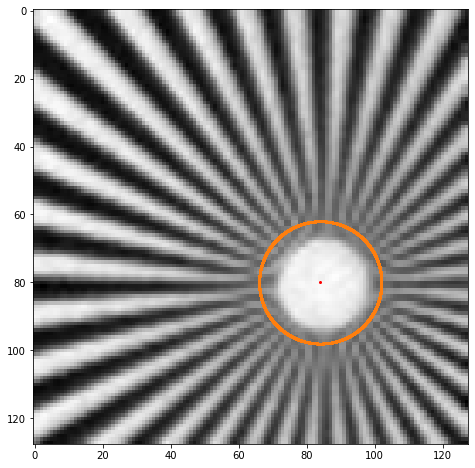

In [78]:
show_radii(b, K*x0, K*y0, res_radius, res_radius)

In [79]:
zooms.append(zoom)
res_radii.append(res_radius)
res_MTFs.append(res_MTF)
obj_resolutions.append(obj_res)
contrasts.append(contrast)
contrast_errors.append(contrast_unc)
radii_ranges.append(radii)

# Overall results

In [80]:
zooms = np.asarray(zooms)
res_radii = np.asarray(res_radii)
res_MTFs = np.asarray(res_MTFs)
obj_resolutions = np.asarray(obj_resolutions)
contrasts = np.asarray(contrasts)
contrast_errors = np.asarray(contrast_errors)
radii_ranges = np.asarray(radii_ranges) 

C:\Users\guima\AppData\Local\Temp/ipykernel_11212/3793136309.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contrasts = np.asarray(contrasts)
C:\Users\guima\AppData\Local\Temp/ipykernel_11212/3793136309.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contrast_errors = np.asarray(contrast_errors)
C:\Users\guima\AppData\Local\Temp/ipykernel_11212/3793136309.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

## Contrast curves for each zoom

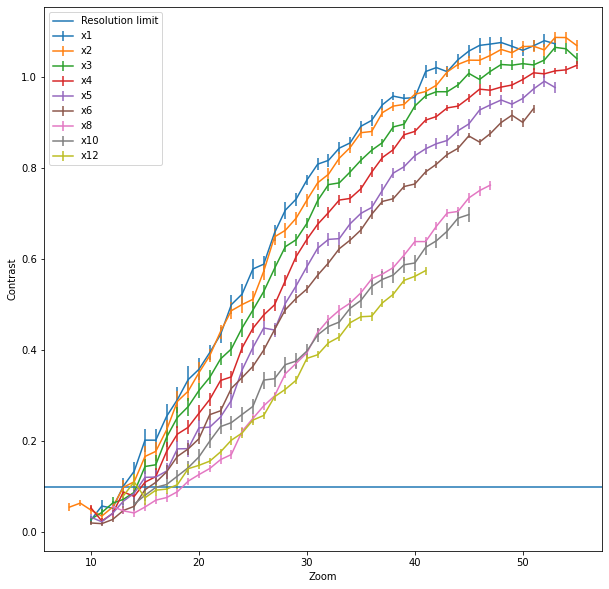

In [81]:
plt.figure(figsize=(10,10))

for radii, zoom, contrast, error in zip(radii_ranges,zooms,contrasts,contrast_errors):
    plt.errorbar(radii, contrast, yerr=error, label=f'x{zoom}')
    
plt.axhline(0.1, label='Resolution limit') # Resolution limit at 10% of the MTF
plt.xlabel('Zoom')
plt.ylabel('Contrast')
plt.legend()

## Object plane resolution for each zoom

### Resolution curve fit

In [82]:
A = resolution_curve_coeffs(zooms, obj_resolutions*1000)
x = np.linspace(zooms.min(), zooms.max(), 100)
fit_values = reciprocal_func(x, A)

Text(6, 30, '$f(x) = \\frac{177.7}{x}$')

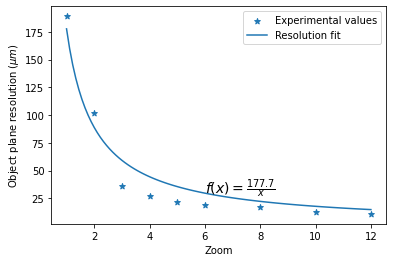

In [83]:
plt.figure()
plt.scatter(zooms, obj_resolutions*1000, marker='*', label='Experimental values')
plt.plot(x, fit_values, label='Resolution fit')
plt.xlabel('Zoom')
plt.ylabel('Object plane resolution ($\mu m$)')
plt.legend()
plt.annotate(r'$f(x) = \frac{{{:.1f}}}{{x}}$'.format(A), xy=(6,30), fontsize=14)

## Detected MTF limit for each zoom

Text(0, 0.5, 'Contrast (MTF)')

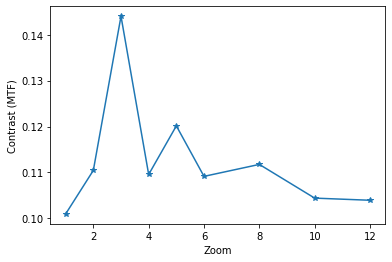

In [84]:
plt.figure()
plt.plot(zooms, res_MTFs, marker='*')
plt.xlabel('Zoom')
plt.ylabel('Contrast (MTF)')

## Removing outliers

Text(6, 30, '$f(x) = \\frac{180.4}{x}$')

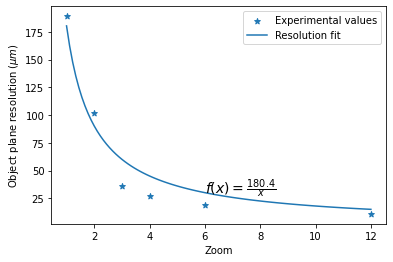

In [85]:
indices = [0,1,2,3,5,8]

A = resolution_curve_coeffs(zooms[indices], obj_resolutions[indices]*1000)
x = np.linspace(zooms[indices].min(), zooms[indices].max(), 100)
fit_values = reciprocal_func(x, A)

plt.figure()
plt.scatter(zooms[indices], obj_resolutions[indices]*1000, marker='*', label='Experimental values')
plt.plot(x, fit_values, label='Resolution fit')
plt.xlabel('Zoom')
plt.ylabel('Object plane resolution ($\mu m$)')
plt.legend()
plt.annotate(r'$f(x) = \frac{{{:.1f}}}{{x}}$'.format(A), xy=(6,30), fontsize=14)

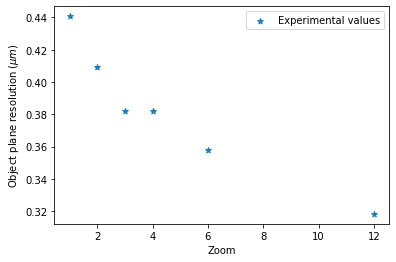

In [86]:
indices = [0,1,2,3,5,8]
freqs = [get_freq(R,36) for R in res_radii[indices]]

plt.figure()
plt.scatter(zooms[indices], freqs, marker='*', label='Experimental values')
plt.xlabel('Zoom')
plt.ylabel('Object plane resolution ($\mu m$)')
plt.legend()

Text(0, 0.5, 'Resolution (lp/mm)')

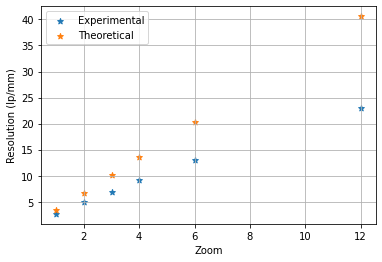

In [87]:
indices = [0,1,2,3,5,8]
res_lpmm = [calculate_lpmm(radius_pix=R, siemens_freq=SIEMENS_FREQ, siemens_radius=SIEMENS_RADIUS,
         phys_mag=MAGNIFICATION, ext_r=R_EXT, zoom=zoom) for R,zoom in zip(res_radii[indices], zooms[indices])]

x = 2 * 768/64/zooms[indices]
img_plane = 13.68*x/1e+3
theo_res = 1/img_plane/MAGNIFICATION

plt.figure()
plt.scatter(zooms[indices], res_lpmm, marker='*', label='Experimental')
plt.scatter(zooms[indices], theo_res, marker='*', label='Theoretical')
plt.legend()
plt.grid()
plt.xlabel('Zoom')
plt.ylabel('Resolution (lp/mm)')

In [ ]:
x = 2 * 768/64/zooms[indices]
img_plane = 13.68*x/1e+3
theo_res = 1/img_plane/MAGNIFICATION

In [ ]:
theo_res